In [ ]:
import numpy as np
import pandas as pd
from statistics import mode

In [ ]:
df=pd.read_csv("haberman.data",header=None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       306 non-null    int64
 1   1       306 non-null    int64
 2   2       306 non-null    int64
 3   3       306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
print("number of dataset with label 1",df.iloc[:,-1][df.iloc[:,-1]==1].count())
print("number of dataset with label 2",df.iloc[:,-1][df.iloc[:,-1]==2].count())

number of dataset with label 1 225
number of dataset with label 2 81


In [ ]:
print("here sample ratio is",225/305,':',81/305)

here sample ratio is 0.7377049180327869 : 0.26557377049180325


so our dataset is moderate imbalanced 

In [ ]:
df.describe()

0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000

let's perform standarization

In [ ]:
df=df.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[:,:-1])
df[:,:-1]=scaler.transform(df[:,:-1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[:,:-1],df[:,-1], train_size=0.8, random_state=99)

In [ ]:
len(y_train)

275

In [ ]:
with open("haberman.names") as f:
    print(f.read())

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [ ]:
def knnl1(x,y,xp,k):
  distance=[]
  for i in range(len(x)):
    di=np.sum(np.absolute(x[i]-xp))
    distance.append(di)
  ind=np.argsort(distance)[:k]
  return mode(y[ind])

In [ ]:
def knnl2(x,y,xp,k):
  distance=[]
  for i in range(len(x)):
    di=np.sqrt(np.sum((x[i]-xp)**2))
    distance.append(di)
  ind=np.argsort(distance)[:k]
  return mode(y[ind],)

In [ ]:
#lets find label for test data
def predictl1(x_train,y_train,x_test,k):
  y_pred=[]
  for i in range(len(x_test)):
    pred=knnl1(x_train,y_train,x_test[i],k)
    y_pred.append(pred)
  return y_pred

In [ ]:
def predictl2(x_train,y_train,x_test,k):
  y_pred=[]
  for i in range(len(x_test)):
    pred=knnl2(x_train,y_train,x_test[i],k)
    y_pred.append(pred)
  return y_pred

In [ ]:
def accuracyscore(y_test,y_pred):
  score=0
  for i in range(len(y_test)):
    if y_test[i]==y_pred[i]:
      score+=1
  return score/len(y_test)

In [ ]:
for i in [1,2,3,4,5]:
  print("accuracy of k nearest neighbour(l1 norm) for k=",i,'is',accuracyscore(y_test,predictl1(x_train,y_train,x_test,i)))

accuracy of k nearest neighbour(l1 norm) for k= 1 is 0.7419354838709677
accuracy of k nearest neighbour(l1 norm) for k= 2 is 0.7419354838709677
accuracy of k nearest neighbour(l1 norm) for k= 3 is 0.7580645161290323
accuracy of k nearest neighbour(l1 norm) for k= 4 is 0.7419354838709677
accuracy of k nearest neighbour(l1 norm) for k= 5 is 0.7580645161290323


In [ ]:
for i in [1,2,3,4,5]:
  print("accuracy of k nearest neighbour(l2 norm) for k=",i,'is',accuracyscore(y_test,predictl2(x_train,y_train,x_test,i)))

accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7258064516129032
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7258064516129032
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7580645161290323
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7419354838709677
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7580645161290323


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3,p=1)
neigh.fit(x_train,y_train)
neigh.predict(x_test)

array([1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1])

In [ ]:
sc1=[[] for i in range(5)]
for i in [0.8,0.6,0.7,0.9]:
  print("for training and test ratio as ",round(i*100),':',round((1-i)*100))
  x_train, x_test, y_train, y_test = train_test_split(df[:,:-1],df[:,-1], train_size=i, random_state=42)
  for j in [1,2,3,4,5]:
    print("accuracy of k nearest neighbour(l2 norm) for k=",j,'is',accuracyscore(y_test,predictl1(x_train,y_train,x_test,j)))
    sc1[j-1].append(accuracyscore(y_test,predictl1(x_train,y_train,x_test,j)))
sc1=np.transpose(sc1)

for training and test ratio as  80 : 20
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.6935483870967742
for training and test ratio as  60 : 40
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.4796747967479675
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.4796747967479675
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7235772357723578
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7317073170731707
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7235772357723578
for training and test ratio as  70 : 30
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.6521739130434783
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.6521739130434783
accuracy of k ne

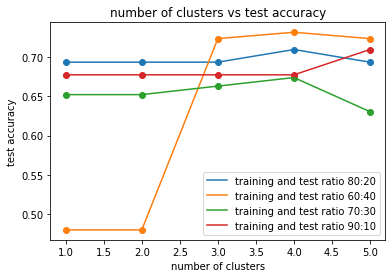

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],sc1[0],label="training and test ratio 80:20")
plt.plot([1,2,3,4,5],sc1[1],label="training and test ratio 60:40")
plt.plot([1,2,3,4,5],sc1[2],label="training and test ratio 70:30")
plt.plot([1,2,3,4,5],sc1[3],label="training and test ratio 90:10")
plt.scatter([1,2,3,4,5],sc1[0])
plt.scatter([1,2,3,4,5],sc1[1])
plt.scatter([1,2,3,4,5],sc1[2])
plt.scatter([1,2,3,4,5],sc1[3])
plt.title("number of clusters vs test accuracy")
plt.xlabel("number of clusters")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [ ]:
sc=[[] for i in range(5)]
for i in [0.8,0.6,0.7,0.9]:
  print("for training and test ratio as ",round(i*100),':',round((1-i)*100))
  x_train, x_test, y_train, y_test = train_test_split(df[:,:-1],df[:,-1], train_size=i, random_state=42)
  for j in [1,2,3,4,5]:
    print("accuracy of k nearest neighbour(l2 norm) for k=",j,'is',accuracyscore(y_test,predictl2(x_train,y_train,x_test,j)))
    sc[j-1].append(accuracyscore(y_test,predictl2(x_train,y_train,x_test,j)))
sc=np.transpose(sc)

for training and test ratio as  80 : 20
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.6451612903225806
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.6451612903225806
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7096774193548387
for training and test ratio as  60 : 40
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.45528455284552843
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.45528455284552843
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7235772357723578
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.6991869918699187
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.6991869918699187
for training and test ratio as  70 : 30
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.6739130434782609
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.6739130434782609
accuracy of k 

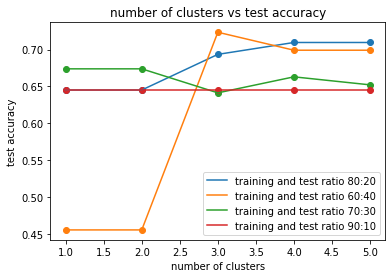

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],sc[0],label="training and test ratio 80:20")
plt.plot([1,2,3,4,5],sc[1],label="training and test ratio 60:40")
plt.plot([1,2,3,4,5],sc[2],label="training and test ratio 70:30")
plt.plot([1,2,3,4,5],sc[3],label="training and test ratio 90:10")
plt.scatter([1,2,3,4,5],sc[0])
plt.scatter([1,2,3,4,5],sc[1])
plt.scatter([1,2,3,4,5],sc[2])
plt.scatter([1,2,3,4,5],sc[3])
plt.title("number of clusters vs test accuracy")
plt.xlabel("number of clusters")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [ ]:
def predictl1sk(x_train,y_train,x_test,k):
  neigh = KNeighborsClassifier(n_neighbors=k,p=1)
  neigh.fit(x_train,y_train)
  return neigh.predict(x_test)  

In [ ]:
def predictl2sk(x_train,y_train,x_test,k):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(x_train,y_train)
  return neigh.predict(x_test)  

In [ ]:
sc1=[[] for i in range(5)]
for i in [0.8,0.6,0.7,0.9]:
  print("for training and test ratio as ",round(i*100),':',round((1-i)*100))
  x_train, x_test, y_train, y_test = train_test_split(df[:,:-1],df[:,-1], train_size=i, random_state=42)
  for j in [1,2,3,4,5]:
    print("accuracy of k nearest neighbour(l2 norm) for k=",j,'is',accuracyscore(y_test,predictl1sk(x_train,y_train,x_test,j)))
    sc1[j-1].append(accuracyscore(y_test,predictl1(x_train,y_train,x_test,j)))
sc1=np.transpose(sc1)

for training and test ratio as  80 : 20
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.6774193548387096
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7096774193548387
for training and test ratio as  60 : 40
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7560975609756098
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7235772357723578
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7235772357723578
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7154471544715447
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7560975609756098
for training and test ratio as  70 : 30
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.5
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7065217391304348
accuracy of k nearest neighbour

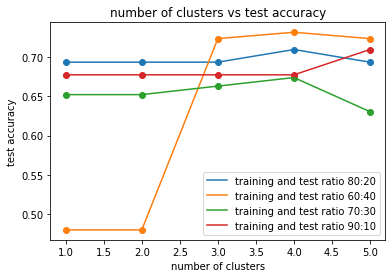

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],sc1[0],label="training and test ratio 80:20")
plt.plot([1,2,3,4,5],sc1[1],label="training and test ratio 60:40")
plt.plot([1,2,3,4,5],sc1[2],label="training and test ratio 70:30")
plt.plot([1,2,3,4,5],sc1[3],label="training and test ratio 90:10")
plt.scatter([1,2,3,4,5],sc1[0])
plt.scatter([1,2,3,4,5],sc1[1])
plt.scatter([1,2,3,4,5],sc1[2])
plt.scatter([1,2,3,4,5],sc1[3])
plt.title("number of clusters vs test accuracy")
plt.xlabel("number of clusters")
plt.ylabel("test accuracy")
plt.legend()
plt.show()

In [ ]:
sc=[[] for i in range(5)]
for i in [0.8,0.6,0.7,0.9]:
  print("for training and test ratio as ",round(i*100),':',round((1-i)*100))
  x_train, x_test, y_train, y_test = train_test_split(df[:,:-1],df[:,-1], train_size=i, random_state=42)
  for j in [1,2,3,4,5]:
    print("accuracy of k nearest neighbour(l2 norm) for k=",j,'is',accuracyscore(y_test,predictl2sk(x_train,y_train,x_test,j)))
    sc[j-1].append(accuracyscore(y_test,predictl2(x_train,y_train,x_test,j)))
sc=np.transpose(sc)

for training and test ratio as  80 : 20
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.6935483870967742
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7096774193548387
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.6774193548387096
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.6935483870967742
for training and test ratio as  60 : 40
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.7560975609756098
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7235772357723578
accuracy of k nearest neighbour(l2 norm) for k= 3 is 0.7154471544715447
accuracy of k nearest neighbour(l2 norm) for k= 4 is 0.7154471544715447
accuracy of k nearest neighbour(l2 norm) for k= 5 is 0.7479674796747967
for training and test ratio as  70 : 30
accuracy of k nearest neighbour(l2 norm) for k= 1 is 0.5
accuracy of k nearest neighbour(l2 norm) for k= 2 is 0.7065217391304348
accuracy of k nearest neighbour

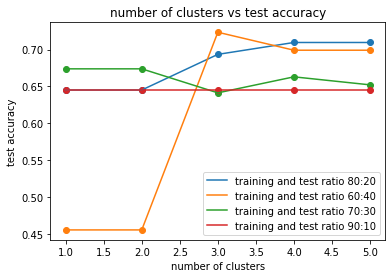

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],sc[0],label="training and test ratio 80:20")
plt.plot([1,2,3,4,5],sc[1],label="training and test ratio 60:40")
plt.plot([1,2,3,4,5],sc[2],label="training and test ratio 70:30")
plt.plot([1,2,3,4,5],sc[3],label="training and test ratio 90:10")
plt.scatter([1,2,3,4,5],sc[0])
plt.scatter([1,2,3,4,5],sc[1])
plt.scatter([1,2,3,4,5],sc[2])
plt.scatter([1,2,3,4,5],sc[3])
plt.title("number of clusters vs test accuracy")
plt.xlabel("number of clusters")
plt.ylabel("test accuracy")
plt.legend()
plt.show()